# 크롤링

In [ ]:
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By

import time
import re

In [ ]:
def instar_searching(word):
    url = "https://www.instagram.com/explore/tags/" + str(word)
    return url

In [ ]:
def select_first(driver):
    first = driver.find_elements(By.CSS_SELECTOR,"div._aagw")[0]
    first.click()
    time.sleep(3)

In [ ]:
def get_content(driver):
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')
    # 본문 내용
    try:
        content = soup.select('div._a9zs')[0].text
    except:
        content = ''
    # 해시태그
    tags = re.findall(r'#[^\s#,\\]+', content)
    
    # 작성일자
    date = soup.select('time._aaqe')[0]['datetime'][:10]
    
    # 좋아요
    try:
        like = soup.select('div._ab8w._ab94._ab99._ab9f._ab9m._ab9p._abcm._ae5m')[0].findAll('span')[-1].text
    except:
        like = 0
    # 위치
    try:
        place = soup.select('div._aaqm')[0].text
    except:
        place = ''
    
    data = [content, date, like, place, tags]
    return data

In [ ]:
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
def move_next(driver):
    right = driver.find_element(By.CSS_SELECTOR,"div._aaqg._aaqh")
    right.click()
    time.sleep(3)

In [ ]:


driver = webdriver.Chrome('chromedriver.exe')

driver.get('https://www.instagram.com')
time.sleep(3)

email = 'dpdmsye@naver.com'
input_id = driver.find_element(By.CSS_SELECTOR,'#loginForm > div > div:nth-child(1) > div > label > input')
input_id.clear()
input_id.send_keys(email)

password = 'insta!120'
input_pw = driver.find_element(By.CSS_SELECTOR,'#loginForm > div > div:nth-child(2) > div > label > input')
input_pw.clear()
input_pw.send_keys(password)
input_pw.submit()

time.sleep(5)



C:\Users\Administrator\AppData\Local\Temp\ipykernel_110940\2537170748.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('chromedriver.exe')


In [ ]:
# 게시물을 조회할 검색 키워드 입력 요청
word = input("검색어를 입력하세요 : ")
word = str(word)
url = instar_searching(word)

검색어를 입력하세요 :  반려견놀이터


In [ ]:
# 검색 결과 페이지 열기
driver.get(url)
time.sleep(8)

# 첫 번째 게시물 클릭
select_first(driver)

# 본격적으로 데이터 수집 시작
results = []
## 수집할 게시물의 수
target = 10
for i in range(target):
    
    try:
        data = get_content(driver)
        results.append(data)
        move_next(driver)
    except:
        time.sleep(2)
        move_next(driver)
    time.sleep(5)
    
print(results[:2])

[['주말엔 놀이터지🐶🐶🤎#덕수공원반려견놀이터 #반려견놀이터#덕수공원#주말엔놀이터로 #다음엔다른곳으로🐕#멍스타그램#멍팔해요#댕댕이🐶 #🐶🐶', '2022-10-30', 0, '', ['#덕수공원반려견놀이터', '#반려견놀이터', '#덕수공원', '#주말엔놀이터로', '#다음엔다른곳으로🐕', '#멍스타그램', '#멍팔해요', '#댕댕이🐶', '#🐶🐶']], ['오늘 놀이터에서💛바다와 사랑이 투샷😍절대 카메라는 봐주지않고\U0001fae0바다 사랑 토리 쓰리샷❣️마지막은 옹기종기🐶🐶🐶🐶인스타 멍뭉이칭구 처음 만나서 신기하고 반가웠어요🙈🤎@bada._.bada #반려견놀이터#덕수공원#멍뭉칭구들이랑#신나게뛰뛰뛰#멍스타그램#멍멍이일상#멍팔해요#멍팔환영#옹기종기#🐶🐶', '2022-10-23', 0, '', ['#반려견놀이터', '#덕수공원', '#멍뭉칭구들이랑', '#신나게뛰뛰뛰', '#멍스타그램', '#멍멍이일상', '#멍팔해요', '#멍팔환영', '#옹기종기', '#🐶🐶']]]


In [ ]:
# 결과를 데이터프레임으로 저장
import pandas as pd
from datetime import datetime

date = datetime.today().strftime('%Y-%m-%d')

results_df = pd.DataFrame(results)
results_df.columns = ['contetnt', 'data', 'like', 'place', 'tags']
results_df.to_excel(date + '_about' +word+' insta crawling.xlsx')

# 데이터 정제 - 텍스트마이닝

In [ ]:
import pandas as pd
import konlpy

In [ ]:
# kkma 만들기
kkma = konlpy.tag.Kkma()

In [ ]:
results_df = pd.read_excel('./data/2022-11-02_about반려견놀이터 insta crawling.xlsx', )
results_df.drop(['Unnamed: 0', 'like'], axis=1, inplace=True)
results_df.drop_duplicates(subset=None, keep='first', \
                                        inplace=False, ignore_index=True)

df = results_df.copy()

In [ ]:
df['contetnt'] = df['contetnt'].str.replace('[^가-힣]', ' ', regex = True)

In [ ]:
# 명사 추출 - apply() 활용
nouns = df['contetnt'].apply(kkma.nouns)
nouns

0       [주말, 놀이터, 덕수공원반려견놀이터, 반려, 반려견놀이터, 견, 덕, 공원, 다음...
1       [오늘, 놀이터, 바다, 사랑이, 투, 투샷, 샷, 절대, 카메라, 사랑, 토리, ...
2       [후추, 후추어멈, 어멈, 여기, 조타, 우리, 자유, 수, 곳, 반상회, 아, 아...
3       [카페, 정상, 정상영업, 영업, 날, 월부, 주, 회, 수요일, 목요일, 평일, ...
4            [개인, 개인사정, 사정, 임시, 휴무, 방, 방문, 문, 불편, 다음주, 나]
                              ...                        
5147    [가을, 남자, 먼지, 행복, 산책, 산책시간, 시간, 동, 세종, 세종시애견유치원...
5148    [월, 일, 일, 멍, 멍크닉, 크닉, 행사, 행사시작, 시작, 쇼, 멍냥, 냥, ...
5149    [개, 개정원, 정원, 단풍, 단풍맛집, 맛, 집, 올해, 색깔, 주말, 토요일, ...
5150    [평화, 사진, 딩, 딩고, 고, 이, 루시, 남자, 스몰, 스몰보더콜리, 보더, ...
5151    [포, 포랜드친구, 랜드, 친구, 할로윈, 할로윈코스튬, 코스튬, 멋, 준비, 귀,...
Name: contetnt, Length: 5152, dtype: object

In [ ]:
# 한 행에 한 단어가 들어가도록 구성
nouns = nouns.explode()
nouns

0               주말
0              놀이터
0       덕수공원반려견놀이터
0               반려
0           반려견놀이터
           ...    
5151         유기견후원
5151            후원
5151          유기견임
5151             임
5151           유기견
Name: contetnt, Length: 201320, dtype: object

In [ ]:
# 데이터 프레임 만들기
df_word = pd.DataFrame({'word':nouns})

# 글자 수 추가
df_word['count'] = df_word['word'].str.len()

# 두 글자 이상 단어만 남기기
df_word = df_word.query('count >= 2')

In [ ]:
# 빈도표 만들기
df_word = df_word.groupby('word', as_index=False)\
        .agg(count = ('word', 'count'))\
        .sort_values('count', ascending=False)
df_word

,word,count
6611,반려,3715
3153,놀이터,3649
6644,반려견놀이터,3461
2034,그램,1996
10755,애견,1816
...,...,...
7889,블루베리,1
7890,블루스,1
7893,블스,1
7896,비공,1


In [ ]:
df_word.to_csv('insta_textmining.csv', encoding='cp949')

# 시각화

## 빈도수 막대그래프

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# '반려견', '놀이터', '반려견놀이터' 제외한 단어 빈도 상위 30개 추출
top = df_word[4:25]
top

,word,count
10755,애견,1816
396,강아지,1432
16110,카페,1385
9706,스타,1375
6617,반려견,1283
12372,운동장,1061
4369,동반,994
12765,유치원,897
18514,호텔,892
3844,댕댕이,886


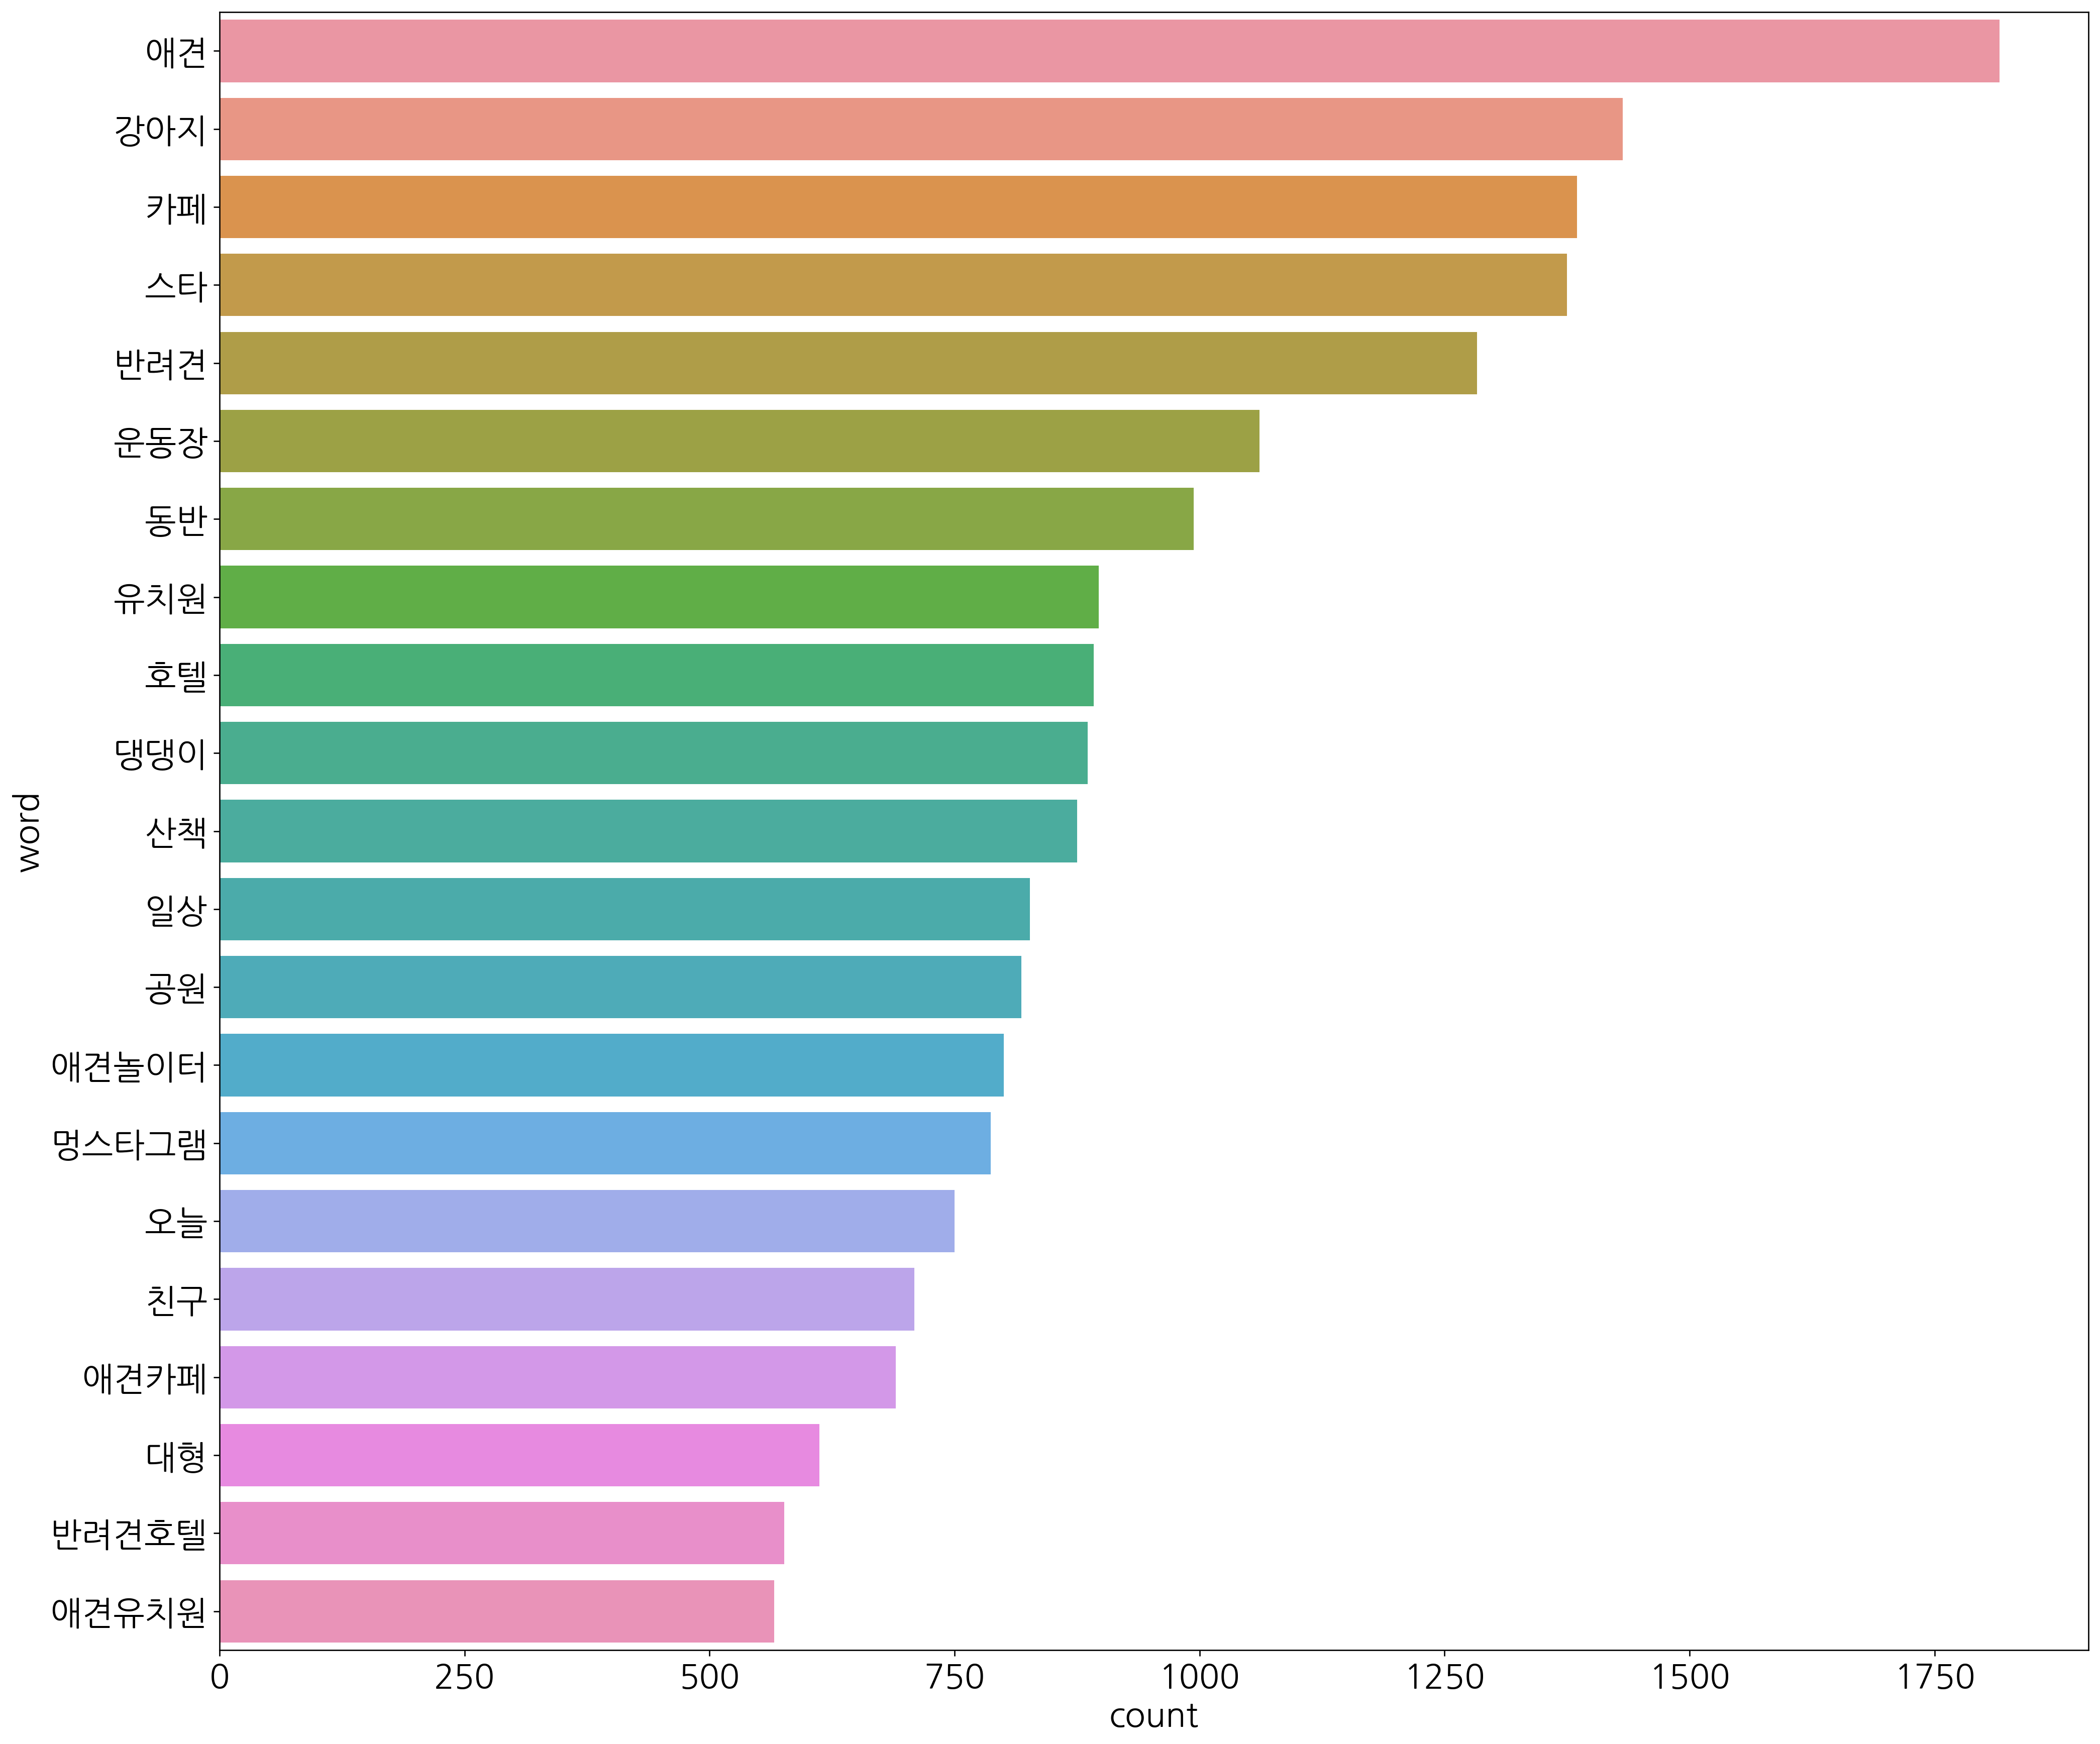

In [ ]:
# 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'

# 가로 세로 크기 설정
plt.rcParams.update({'font.family':'NanumGothic',
                     'font.size':'20',
                     'figure.dpi':'240',
                     'figure.figsize' : [20, 18]})

# 막대 그래프 만들기
sns.barplot(data = top, y='word', x = 'count')
plt.savefig('./data/insta_barplot.png',
            facecolor='#eeeeee',
            edgecolor='black',
            format='png', dpi=200)

## 워드클라우드

In [ ]:
from wordcloud import WordCloud
import PIL
import numpy as np

In [ ]:
# 데이터 프레임을 딕셔너리로 변환
dic_word = df_word[4:].set_index('word').to_dict()['count']

# 폰트 설정
font = 'NanumBarunGothicBold.ttf'

# mask 만들기
icon = PIL.Image.open('image.png')
img = PIL.Image.new('RGB', icon.size, (255, 255, 255))
img.paste(icon, icon)
img = np.array(img)

# wc 만들기
wc = WordCloud(random_state=1234,
         font_path=font,
         width=800,
         height=800,
         background_color='white',
        mask = img,
              # colormap='inferno'
              )

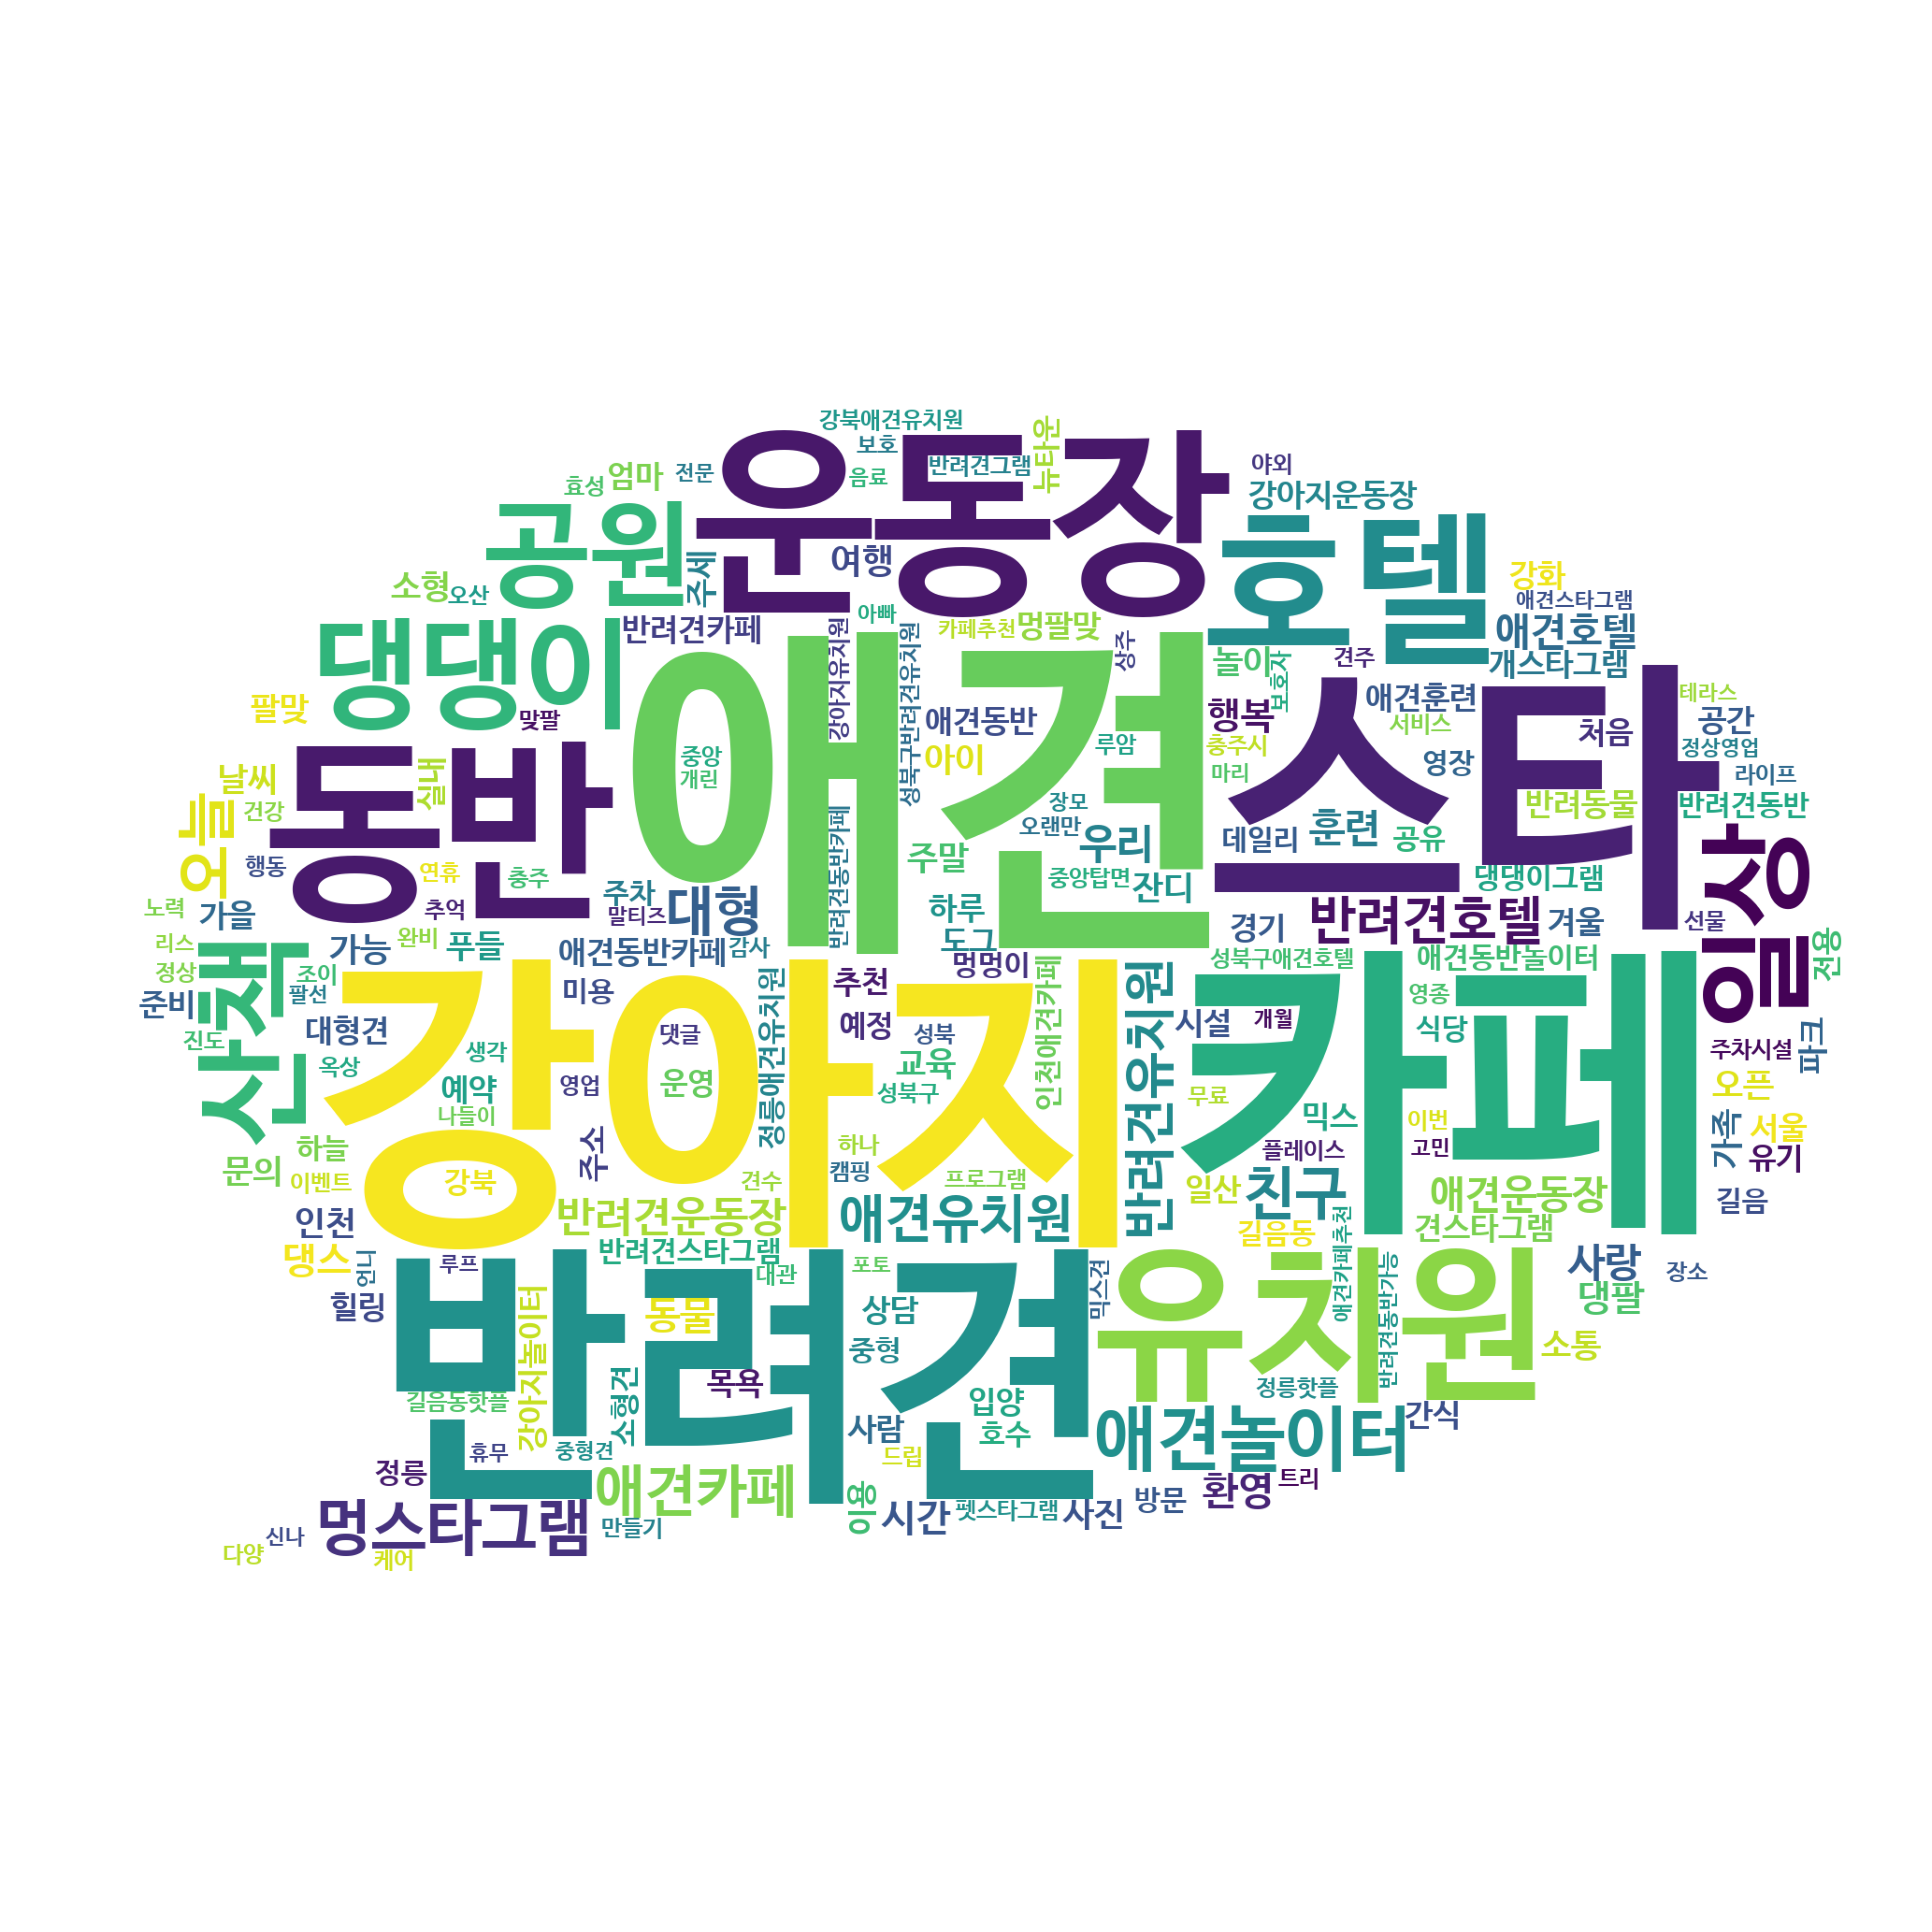

In [ ]:
# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 워드 클라우드 출력하기
plt.figure(figsize = (30, 30))
plt.axis('off')
plt.imshow(img_wordcloud)
plt.savefig('./data/insta_wc.png')


## 특수문자 제거

In [ ]:
import re
df['contetnt'] = [re.sub('[^a-zA-Z가-힣]', ' ', df['contetnt'][i]).split()\
                   for i in range(df.shape[0])]
df['tags'] = [re.sub('[^a-zA-Z가-힣]', ' ', df['tags'][i]).split()\
                   for i in range(df.shape[0])]

TypeError: expected string or bytes-like object